# HELP International Clustering and PCA

Overview:
    HELP International is an international humanitarian NGO that is committed to fighting poverty and providing the people of 
    backward countries with basic amenities and relief during the time of disasters and natural calamities.
    After the recent project that included a lot of awareness drives and funding programmes, they have been able to raise           around $ 10 million. Now the CEO of the NGO needs to decide how to use this money strategically and effectively.
    
    
    

In [206]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [207]:
HELP = pd.read_csv("Country-data.csv",sep = ',',encoding = "ISO-8859-1", header= 0)

In [208]:
HELP.head()

,country,child_mort,exports,health,imports,income,inflation,life_expec,total_fer,gdpp
0,Afghanistan,90.2,10.0,7.58,44.9,1610,9.44,56.2,5.82,553
1,Albania,16.6,28.0,6.55,48.6,9930,4.49,76.3,1.65,4090
2,Algeria,27.3,38.4,4.17,31.4,12900,16.10,76.5,2.89,4460
3,Angola,119.0,62.3,2.85,42.9,5900,22.40,60.1,6.16,3530
4,Antigua and Barbuda,10.3,45.5,6.03,58.9,19100,1.44,76.8,2.13,12200


In [209]:
#Check for null values
HELP.isnull().sum()*100/HELP.shape[0]

country       0.0
child_mort    0.0
exports       0.0
health        0.0
imports       0.0
income        0.0
inflation     0.0
life_expec    0.0
total_fer     0.0
gdpp          0.0
dtype: float64

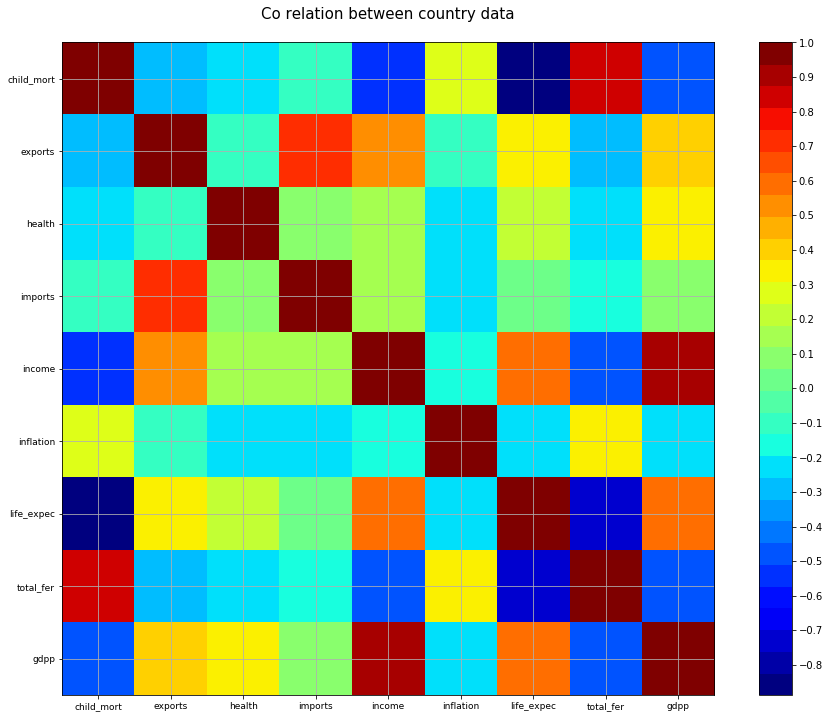

In [210]:
# ** PCA begins **
#Let's find the co relation between the data

def correlation_matrix(df):
    from matplotlib import pyplot as plt
    from matplotlib import cm as cm

    fig = plt.figure(figsize=(16,12))
    ax1 = fig.add_subplot(111)
    cmap = cm.get_cmap('jet', 30)
    cax = ax1.imshow(df.corr(), interpolation="nearest", cmap=cmap)
    ax1.grid(True)
    plt.title('Co relation between country data\n',fontsize=15)
    labels=df.columns
    ax1.set_xticklabels(labels,fontsize=9)
    ax1.set_yticklabels(labels,fontsize=9)
    # Add colorbar, make sure to specify tick locations to match desired ticklabels
    fig.colorbar(cax, ticks=[0.1*i for i in range(-11,11)])
    plt.show()

correlation_matrix(HELP)

In [211]:
#Standardising the values using standard scalar

from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
X = HELP.drop('country',axis=1)
Y = HELP['country']

In [212]:
X = scaler.fit_transform(X)

In [213]:
HELP_scalar = pd.DataFrame(data=X,columns=HELP.columns[1:])

In [214]:
HELP_scalar.head(10)

,child_mort,exports,health,imports,income,inflation,life_expec,total_fer,gdpp
0,1.291532,-1.138280,0.279088,-0.082455,-0.808245,0.157336,-1.619092,1.902882,-0.679180
1,-0.538949,-0.479658,-0.097016,0.070837,-0.375369,-0.312347,0.647866,-0.859973,-0.485623
2,-0.272833,-0.099122,-0.966073,-0.641762,-0.220844,0.789274,0.670423,-0.038404,-0.465376
3,2.007808,0.775381,-1.448071,-0.165315,-0.585043,1.387054,-1.179234,2.128151,-0.516268
4,-0.695634,0.160668,-0.286894,0.497568,0.101732,-0.601749,0.704258,-0.541946,-0.041817
5,-0.591177,-0.812628,0.468966,-1.279787,0.080920,1.244725,0.591474,-0.382933,-0.145791
6,-0.501643,-0.743107,-0.882089,-0.065883,-0.543421,-0.001123,0.309514,-0.833471,-0.533233
7,-0.832423,-0.779697,0.699011,-1.076779,1.261966,-0.628316,1.290735,-0.674457,2.130699
8,-0.844858,0.372890,1.527901,0.037693,1.355617,-0.655549,1.121559,-0.999109,1.857082
9,0.023128,0.482661,-0.341667,-1.085065,-0.059556,0.571037,-0.164178,-0.681083,-0.389857


In [215]:
from sklearn.decomposition import PCA

In [216]:
pca = PCA(svd_solver='randomized', random_state=42)

In [217]:
HELP_pca_initial = pca.fit(HELP_scalar)

In [218]:
pca.components_

array([[-0.41951945,  0.28389698,  0.15083782,  0.16148244,  0.39844111,
        -0.19317293,  0.42583938, -0.40372896,  0.39264482],
       [ 0.19288394,  0.61316349, -0.24308678,  0.67182064,  0.02253553,
        -0.00840447, -0.22270674,  0.15523311, -0.0460224 ],
       [-0.02954353,  0.14476069, -0.59663237, -0.29992674,  0.3015475 ,
         0.64251951,  0.11391854,  0.01954925,  0.12297749],
       [ 0.37065326,  0.00309102,  0.4618975 , -0.07190746,  0.39215904,
         0.15044176, -0.20379723,  0.37830365,  0.53199457],
       [-0.16896968,  0.05761584,  0.51800037,  0.25537642, -0.2471496 ,
         0.7148691 ,  0.1082198 , -0.13526221, -0.18016662],
       [ 0.20062815, -0.05933283,  0.00727646, -0.03003154,  0.16034699,
         0.06628537, -0.60112652, -0.75068875,  0.01677876],
       [-0.07948854, -0.70730269, -0.24983051,  0.59218953,  0.09556237,
         0.10463252,  0.01848639,  0.02882643,  0.24299776],
       [-0.68274306, -0.01419742,  0.07249683, -0.02894642,  0

In [219]:
col = list(HELP_scalar.columns)
pca_df = pd.DataFrame({'PC1':pca.components_[0],'PC2':pca.components_[1], 'Feature':col})
pca_df.head()

,PC1,PC2,Feature
0,-0.419519,0.192884,child_mort
1,0.283897,0.613163,exports
2,0.150838,-0.243087,health
3,0.161482,0.671821,imports
4,0.398441,0.022536,income


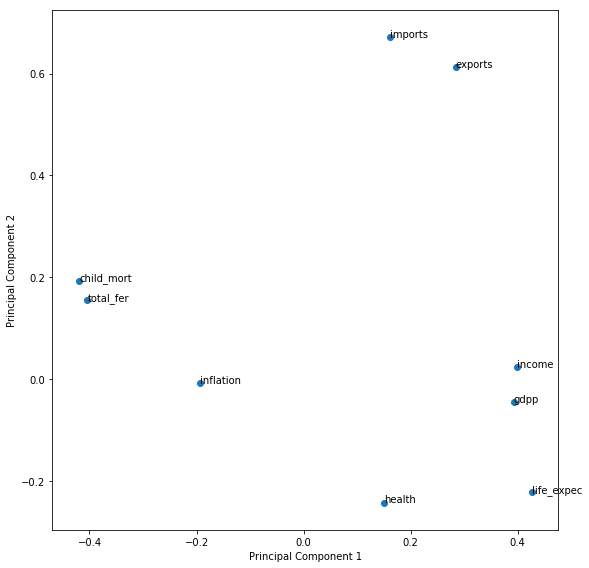

In [220]:
%matplotlib inline
fig = plt.figure(figsize = (8,8))
plt.scatter(pca_df.PC1, pca_df.PC2)
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
for i, txt in enumerate(pca_df.Feature):
    plt.annotate(txt, (pca_df.PC1[i],pca_df.PC2[i]))
plt.tight_layout()
plt.show()

In [221]:
pca.explained_variance_ratio_

array([0.4595174 , 0.17181626, 0.13004259, 0.11053162, 0.07340211,
       0.02484235, 0.0126043 , 0.00981282, 0.00743056])

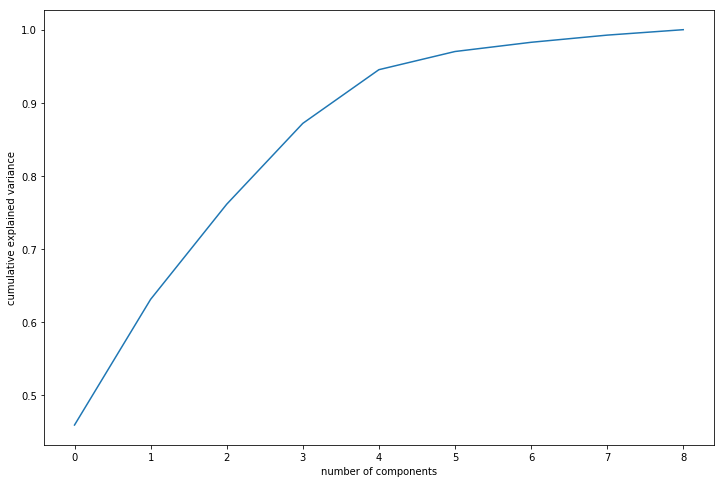

In [222]:
#screeplot to plot the cumulative variance against the number of components
%matplotlib inline
fig = plt.figure(figsize = (12,8))
plt.plot(np.cumsum(pca.explained_variance_ratio_))
plt.xlabel('number of components')
plt.ylabel('cumulative explained variance')
plt.show()

The scree plot shows the variance of 95% at approximately 4 components.

Hence the number of principal components we choose would be 4

In [223]:
#Incremental PCA for efficiency

from sklearn.decomposition import IncrementalPCA

final_pca = IncrementalPCA(n_components=4)

In [224]:
HELP_pca = final_pca.fit_transform(HELP_scalar)
HELP_pca.shape

(167, 4)

In [225]:
#Create a correlation matrix for the PCs

matrix = np.corrcoef(HELP_pca.transpose())

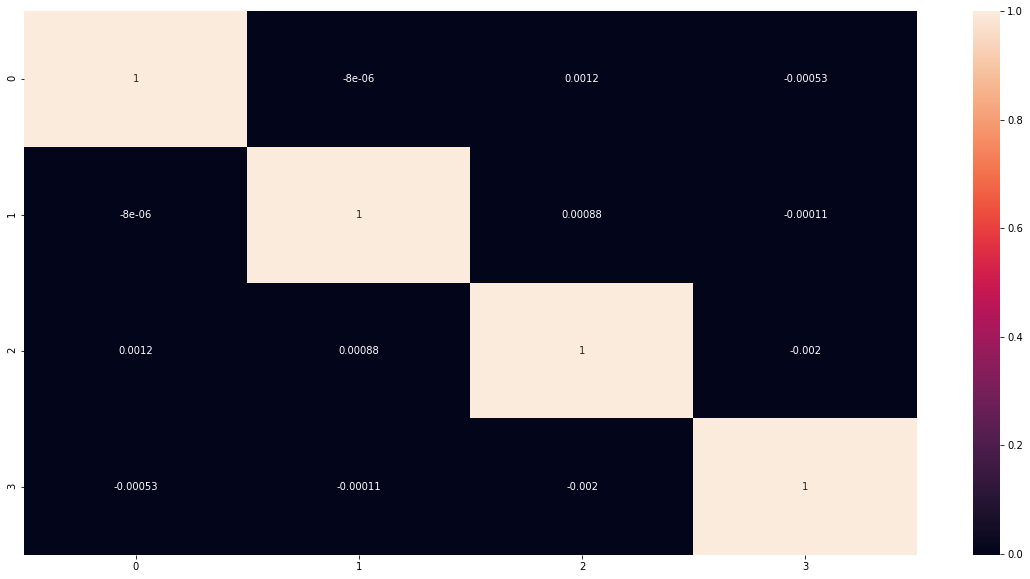

In [226]:
#plotting the correlation matrix
%matplotlib inline
plt.figure(figsize = (20,10))
sns.heatmap(matrix,annot = True)

In [227]:

matrix_nodiag = matrix - np.diagflat(matrix.diagonal())
print("max corr:",matrix_nodiag.max(), ", min corr: ", matrix_nodiag.min(),)


max corr: 0.0011961925092544112 , min corr:  -0.002037829535552029


To ensure that the PCs have the least correlation, we check the minimum and maximum correlation between them. 

We see that the correlations is close to 0 which lets us proceed.


In [228]:
HELP_pc = pd.DataFrame(HELP_pca)
HELP_pc.index=HELP['country']
HELP_pc.columns = ['PC1','PC2','PC3','PC4']
HELP_pc.head()

,PC1,PC2,PC3,PC4
country,,,,
Afghanistan,-2.913787,0.088354,0.721003,0.996699
Albania,0.429358,-0.587859,0.321052,-1.171193
Algeria,-0.282988,-0.446657,-1.225135,-0.850127
Angola,-2.930969,1.699437,-1.521734,0.875966
Antigua and Barbuda,1.031988,0.130488,0.192922,-0.844808


In [229]:
# ** PCA ends **

In [230]:
# ** K-Means Clustering begins **

In [231]:
from sklearn.cluster import KMeans
from scipy.cluster.hierarchy import linkage
from scipy.cluster.hierarchy import dendrogram
from scipy.cluster.hierarchy import cut_tree

In [232]:
from sklearn.neighbors import NearestNeighbors
from random import sample
from numpy.random import uniform
import numpy as np
from math import isnan
 
def hopkins(X):
    d = X.shape[1]
    #d = len(vars) # columns
    n = len(X) # rows
    m = int(0.1 * n) 
    nbrs = NearestNeighbors(n_neighbors=1).fit(X.values)
 
    rand_X = sample(range(0, n, 1), m)
 
    ujd = []
    wjd = []
    for j in range(0, m):
        u_dist, _ = nbrs.kneighbors(uniform(np.amin(X,axis=0),np.amax(X,axis=0),d).reshape(1, -1), 2, return_distance=True)
        ujd.append(u_dist[0][1])
        w_dist, _ = nbrs.kneighbors(X.iloc[rand_X[j]].values.reshape(1, -1), 2, return_distance=True)
        wjd.append(w_dist[0][1])
 
    H = sum(ujd) / (sum(ujd) + sum(wjd))
    if isnan(H):
        print(ujd, wjd)
        H = 0
 
    return H

In [233]:
hopkins(HELP_pc)

0.8141323092579955

We start with the HOPKINS Score to check the feasibility of forming the cluster using the Hopkins function. A score above 70% indicates it is feasible to form a good cluster.

In our case, we get a score of above 70% which is good to proceed.


In [234]:
from sklearn.metrics import silhouette_score
sse_ = []
for k in range(2, 15):
    kmeans = KMeans(n_clusters=k).fit(HELP_pc)
    sse_.append([k, silhouette_score(HELP_pc, kmeans.labels_)])

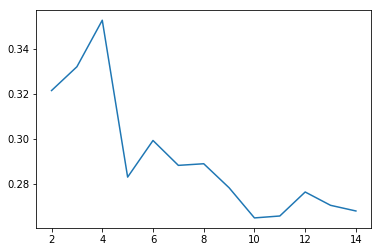

In [235]:
plt.plot(pd.DataFrame(sse_)[0], pd.DataFrame(sse_)[1]);

We calculate Silhouette Score graph where the first peak would be considered for  number of clusters. In our case, it shows 4.


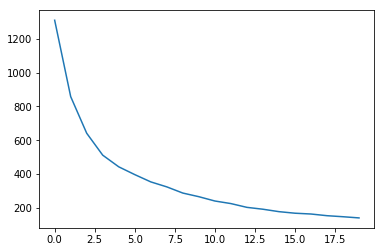

In [236]:
# sum of squared distances
ssd = []
for num_clusters in list(range(1,21)):
    model_clus = KMeans(n_clusters = num_clusters, max_iter=50)
    model_clus.fit(HELP_pc)
    ssd.append(model_clus.inertia_)

plt.plot(ssd)

We run the sum of squared distances and plot the graph. Elbow of the curve indicates the number of clusters and in our case, elbow curve indicates to 4 as the number of clusters to be formed.


In [237]:
#Build the K Means model

clustermodel = KMeans(n_clusters=4, init='random', n_init=10, max_iter=50).fit(HELP_pc)

In [238]:
# To analyse the clusters formed

HELP.index = pd.RangeIndex(len(HELP.index))
HELP_km = pd.concat([HELP, pd.Series(clustermodel.labels_)], axis=1)

HELP_km.columns = ['country','child_mort','exports','health','imports','income','inflation','life_expec','total_fer','gdpp','ClusterID']

kmcluster_child_mort = 	pd.DataFrame(HELP_km.groupby(["ClusterID"]).child_mort.mean())
kmcluster_exports = 	pd.DataFrame(HELP_km.groupby(["ClusterID"]).exports.mean())
kmcluster_health = 	pd.DataFrame(HELP_km.groupby(["ClusterID"]).health.mean())
kmcluster_imports = 	pd.DataFrame(HELP_km.groupby(["ClusterID"]).imports.mean())
kmcluster_income = 	pd.DataFrame(HELP_km.groupby(["ClusterID"]).income.mean())
kmcluster_inflation = 	pd.DataFrame(HELP_km.groupby(["ClusterID"]).inflation.mean())
kmcluster_life_expec = 	pd.DataFrame(HELP_km.groupby(["ClusterID"]).life_expec.mean())
kmcluster_total_fer = 	pd.DataFrame(HELP_km.groupby(["ClusterID"]).total_fer.mean())
kmcluster_gdpp = 	pd.DataFrame(HELP_km.groupby(["ClusterID"]).gdpp.mean())

In [239]:
km_df = pd.concat([pd.Series([0,1,2,3]), kmcluster_child_mort, kmcluster_exports, kmcluster_health,kmcluster_imports,kmcluster_income,kmcluster_inflation,kmcluster_life_expec,kmcluster_total_fer,kmcluster_gdpp], axis=1)
km_df.columns = ["ClusterID", 'child_mort_mean','exports_mean','health_mean','imports_mean','income_mean','inflation_mean','life_expec_mean','total_fer_mean','gdpp_mean']
km_df.head()

,ClusterID,child_mort_mean,exports_mean,health_mean,imports_mean,income_mean,inflation_mean,life_expec_mean,total_fer_mean,gdpp_mean
0,0,4.133333,176.000000,6.793333,156.666667,64033.333333,2.468000,81.433333,1.380000,57566.666667
1,1,21.113793,41.291828,6.217241,47.636390,13297.586207,7.371506,73.147126,2.251954,7158.298851
2,2,91.610417,29.571042,6.433542,43.133333,3897.354167,11.911146,59.239583,4.992083,1909.208333
3,3,4.982759,45.703448,9.245862,39.513793,45762.068966,2.727793,80.386207,1.814828,44065.517241


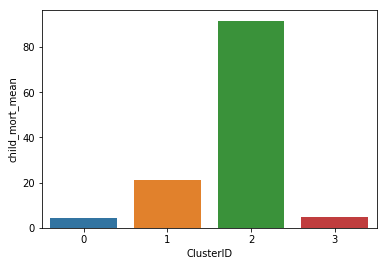

In [240]:
sns.barplot(x=km_df.ClusterID, y=km_df.child_mort_mean)

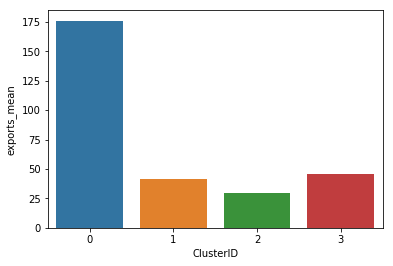

In [241]:
sns.barplot(x=km_df.ClusterID, y=km_df.exports_mean)

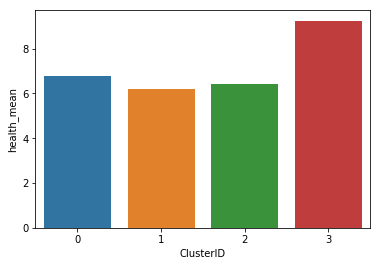

In [242]:
sns.barplot(x=km_df.ClusterID, y=km_df.health_mean)

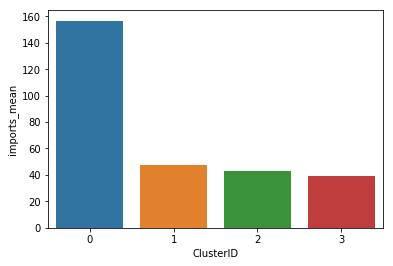

In [243]:
sns.barplot(x=km_df.ClusterID, y=km_df.imports_mean)

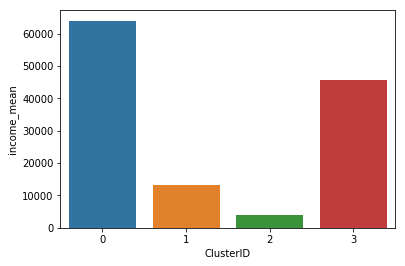

In [244]:
sns.barplot(x=km_df.ClusterID, y=km_df.income_mean)

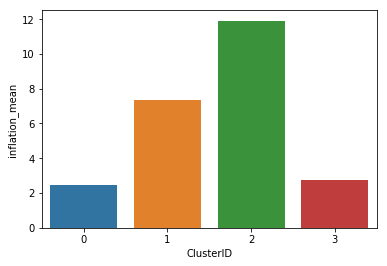

In [245]:
sns.barplot(x=km_df.ClusterID, y=km_df.inflation_mean)

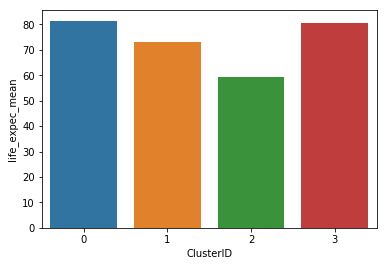

In [246]:
sns.barplot(x=km_df.ClusterID, y=km_df.life_expec_mean)

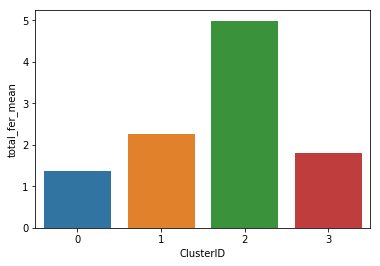

In [247]:
sns.barplot(x=km_df.ClusterID, y=km_df.total_fer_mean)

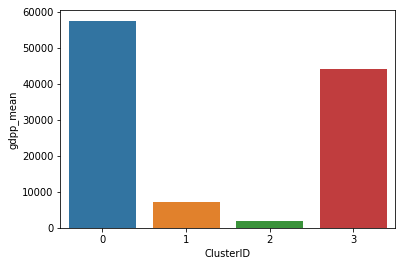

In [248]:
sns.barplot(x=km_df.ClusterID, y=km_df.gdpp_mean)

In [249]:
HELP_km.head()

,country,child_mort,exports,health,imports,income,inflation,life_expec,total_fer,gdpp,ClusterID
0,Afghanistan,90.2,10.0,7.58,44.9,1610,9.44,56.2,5.82,553,2
1,Albania,16.6,28.0,6.55,48.6,9930,4.49,76.3,1.65,4090,1
2,Algeria,27.3,38.4,4.17,31.4,12900,16.10,76.5,2.89,4460,1
3,Angola,119.0,62.3,2.85,42.9,5900,22.40,60.1,6.16,3530,2
4,Antigua and Barbuda,10.3,45.5,6.03,58.9,19100,1.44,76.8,2.13,12200,1


In [250]:
# ** K Mean clustering ends **

In [251]:
# ** Hierarchical Clustering begins **

We create a dendrogram using single linkage and complete linkage.


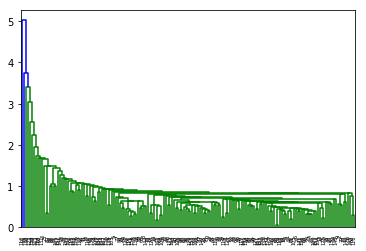

In [252]:
dendo_merge = linkage(HELP_pc, method = "single", metric='euclidean')
dendrogram(dendo_merge)
plt.show()

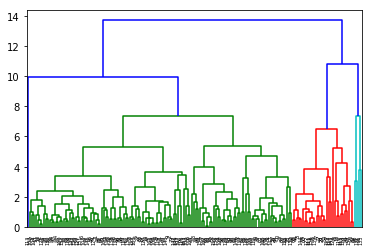

In [253]:
dendo_merge = linkage(HELP_pc, method = "complete", metric='euclidean')
dendrogram(dendo_merge)
plt.show()

Since its huge data set, we will decide on a height to cut the dendrogram.

After few trail and error, we decide on the height to be 3.


In [254]:
ClusterHC = pd.Series(cut_tree(dendo_merge, n_clusters = 3).reshape(-1,))
HELP_hc = pd.concat([HELP, ClusterHC], axis=1)
HELP_hc.columns = ['country','child_mort','exports','health','imports','income','inflation','life_expec','total_fer','gdpp','ClusterID']

In [255]:
hccluster_child_mort = 	pd.DataFrame(HELP_hc.groupby(["ClusterID"]).child_mort.mean())
hccluster_exports = 	pd.DataFrame(HELP_hc.groupby(["ClusterID"]).exports.mean())
hccluster_health = 	pd.DataFrame(HELP_hc.groupby(["ClusterID"]).health.mean())
hccluster_imports = 	pd.DataFrame(HELP_hc.groupby(["ClusterID"]).imports.mean())
hccluster_income = 	pd.DataFrame(HELP_hc.groupby(["ClusterID"]).income.mean())
hccluster_inflation = 	pd.DataFrame(HELP_hc.groupby(["ClusterID"]).inflation.mean())
hccluster_life_expec = 	pd.DataFrame(HELP_hc.groupby(["ClusterID"]).life_expec.mean())
hccluster_total_fer = 	pd.DataFrame(HELP_hc.groupby(["ClusterID"]).total_fer.mean())
hccluster_gdpp = 	pd.DataFrame(HELP_hc.groupby(["ClusterID"]).gdpp.mean())

In [256]:
hc_df = pd.concat([pd.Series([0,1,2]), hccluster_child_mort, hccluster_exports, hccluster_health,hccluster_imports,hccluster_income,hccluster_inflation,hccluster_life_expec,hccluster_total_fer,hccluster_gdpp], axis=1)
hc_df.columns = ["ClusterID", 'child_mort_mean','exports_mean','health_mean','imports_mean','income_mean','inflation_mean','life_expec_mean','total_fer_mean','gdpp_mean']
hc_df.head()

,ClusterID,child_mort_mean,exports_mean,health_mean,imports_mean,income_mean,inflation_mean,life_expec_mean,total_fer_mean,gdpp_mean
0,0,46.772727,36.228023,6.407424,45.908833,9278.507576,8.817038,68.106061,3.226742,5200.106061
1,1,6.138710,47.138710,8.666452,38.474194,45996.774194,4.274935,79.841935,1.937742,41777.419355
2,2,6.700000,155.450000,5.945000,144.500000,53125.000000,0.798500,79.425000,1.577500,45875.000000


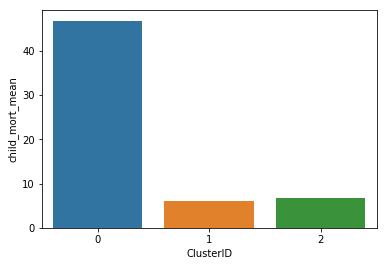

In [257]:
sns.barplot(x=hc_df.ClusterID, y=hc_df.child_mort_mean)

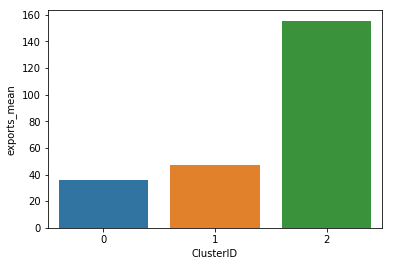

In [258]:
sns.barplot(x=hc_df.ClusterID, y=hc_df.exports_mean)

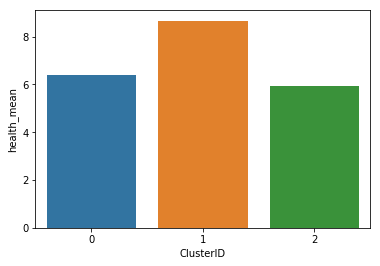

In [259]:
sns.barplot(x=hc_df.ClusterID, y=hc_df.health_mean)

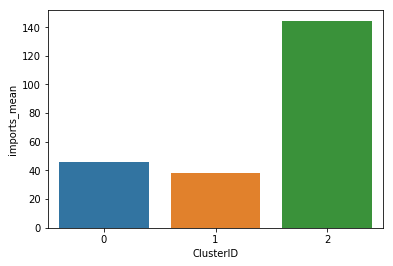

In [260]:
sns.barplot(x=hc_df.ClusterID, y=hc_df.imports_mean)

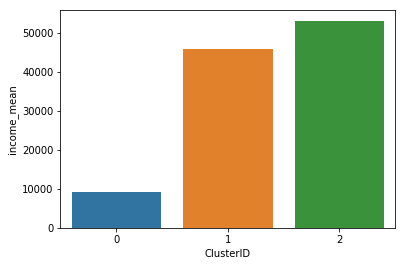

In [261]:
sns.barplot(x=hc_df.ClusterID, y=hc_df.income_mean)

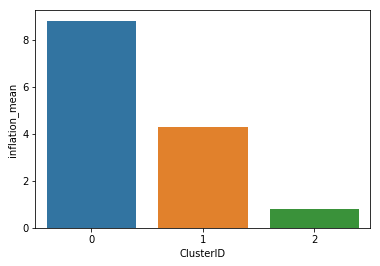

In [262]:
sns.barplot(x=hc_df.ClusterID, y=hc_df.inflation_mean)

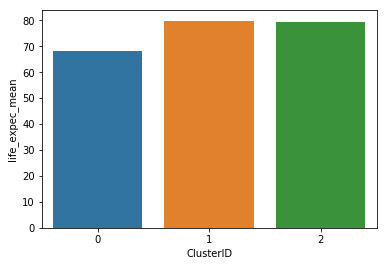

In [263]:
sns.barplot(x=hc_df.ClusterID, y=hc_df.life_expec_mean)

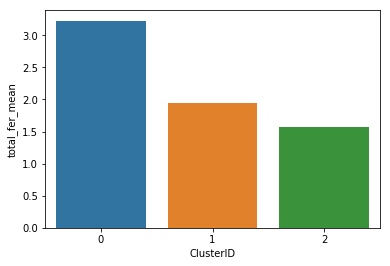

In [264]:
sns.barplot(x=hc_df.ClusterID, y=hc_df.total_fer_mean)

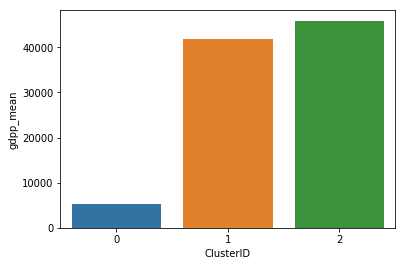

In [265]:
sns.barplot(x=hc_df.ClusterID, y=hc_df.gdpp_mean)

In [266]:
#Lets consider the output of both K Mean and Hierarchical Clustering

country_km = HELP_km.loc[(HELP_km.ClusterID == 2)]
country_hc = HELP_km.loc[(HELP_hc.ClusterID == 0)]

In [270]:
#Find the number of countries when we use Hierarchical Clustering
country_km.shape

(48, 11)

In [271]:
#Find the number of countries when we use K Mean Clustering
country_hc.shape

(132, 11)

As it shows 48 countries under K Mean and 132 under Hierarchical, we will choose to go ahead with the list of countries from K Mean Clustering.

In [273]:
#List the countries 

country_km

,country,child_mort,exports,health,imports,income,inflation,life_expec,total_fer,gdpp,ClusterID
0,Afghanistan,90.2,10.00,7.58,44.9,1610,9.440,56.2,5.82,553,2
3,Angola,119.0,62.30,2.85,42.9,5900,22.400,60.1,6.16,3530,2
17,Benin,111.0,23.80,4.10,37.2,1820,0.885,61.8,5.36,758,2
21,Botswana,52.5,43.60,8.30,51.3,13300,8.920,57.1,2.88,6350,2
25,Burkina Faso,116.0,19.20,6.74,29.6,1430,6.810,57.9,5.87,575,2
26,Burundi,93.6,8.92,11.60,39.2,764,12.300,57.7,6.26,231,2
28,Cameroon,108.0,22.20,5.13,27.0,2660,1.910,57.3,5.11,1310,2
31,Central African Republic,149.0,11.80,3.98,26.5,888,2.010,47.5,5.21,446,2
32,Chad,150.0,36.80,4.53,43.5,1930,6.390,56.5,6.59,897,2
36,Comoros,88.2,16.50,4.51,51.7,1410,3.870,65.9,4.75,769,2


We go with the list of countries from K Mean to get the final list of countries. As 10 million would be less to be distributed among 48 countries, we do the below steps to narrow down the list of countries.

We can take the mean of Child Mortality, Income, Inflation and GDPP forthat particular cluster i.e.,  Cluster 2 from prior output
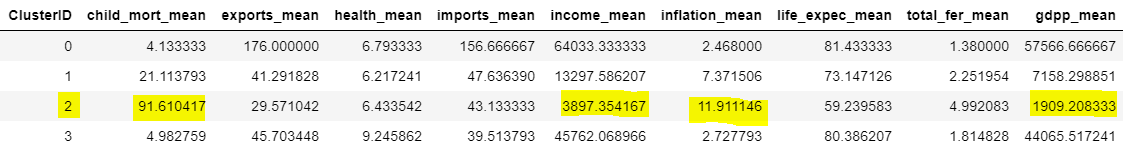

Set this to a new data frame

We consider the above mean value of each key factor as a cut-off to get the set of countries that fall within that cut-off value.

For child mortality we choose > 91%, income we choose < 3898, inflation we choose >11.9%, gdpp we choose 	< 1910.

We then get a list of five countries that would require aid

In [274]:
countries= HELP_km.loc[(HELP_km.child_mort>91)&(HELP_km.income<3898)&(HELP_km.inflation>11.9)&(HELP_km.gdpp<1910)]

In [280]:
countries

,country,child_mort,exports,health,imports,income,inflation,life_expec,total_fer,gdpp,ClusterID
26,Burundi,93.6,8.92,11.60,39.2,764,12.3,57.7,6.26,231,2
37,"Congo, Dem. Rep.",116.0,41.10,7.91,49.6,609,20.8,57.5,6.54,334,2
63,Guinea,109.0,30.30,4.93,43.2,1190,16.1,58.0,5.34,648,2
99,Mauritania,97.4,50.70,4.41,61.2,3320,18.9,68.2,4.98,1200,2
132,Sierra Leone,160.0,16.80,13.10,34.5,1220,17.2,55.0,5.20,399,2


# Conclusion 

The countries that would require aid would be,


1. Burundi
2. Democratic Republic of Congo
3. Guinea
4. Mauritania
5. Sierra Leone
